In [2]:
%reset -f
%matplotlib inline
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import pylab as pl
import seaborn.apionly as sns 
import matplotlib
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
import warnings
warnings.filterwarnings('ignore')

## 1) Computing time comparison: Binacox vs. MT methods

<Figure size 1080x504 with 0 Axes>

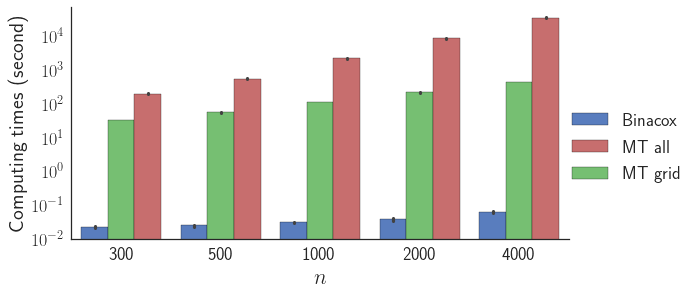

In [8]:
data = pd.read_json("./results_data/time1")
# order method for the figure
data = data[data.method != "MT all"].append(data[data.method == "MT all"], 
                                            ignore_index=True)

fig = pl.figure(figsize=(15, 7))
sns.set(style="white")
g = sns.factorplot(x="n", 
                   y="time", 
                   hue="method", 
                   data=data,
                   aspect=2,
                   kind="bar",
                   edgecolor='black',
                   palette="muted",
                   legend=False)
g.set_ylabels(r"Computing times (second)", fontsize=21)
g.set_xlabels(r"$n$", fontsize=22)
g.set_xticklabels(fontsize = 18)
g.set_yticklabels(fontsize = 18)
g.fig.get_axes()[0].set_yscale('log')
g.add_legend(fontsize = 18)
pl.savefig('./figures/time.pdf', bbox_inches='tight')
pl.show()

## 2) Computing times $=f(p)$ for BinaCox

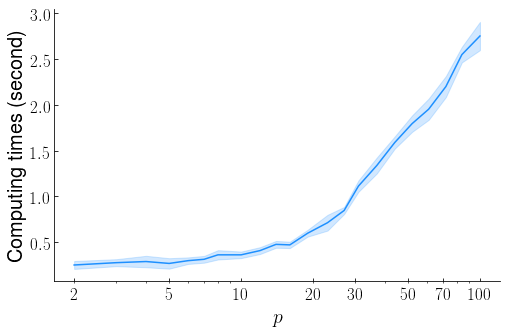

In [11]:
sns.reset_orig()
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

data = pd.read_json("./results_data/time2")
data = data[data.columns.sort_values()]

fig = pl.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
mean = data.mean()       
n_simu = data.shape[1]
eps = data.std() / np.sqrt(n_simu) * 1.96
pl.plot(data.columns, mean, color="dodgerblue")
pl.fill_between(data.columns, mean - eps, mean + eps, 
                color="dodgerblue", alpha=0.2)            
ax.tick_params(axis='both', which='major', direction='in', labelsize=17)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel('$p$', fontsize=20)
ax.set_ylabel('Computing times (second)', fontsize=20)
ax.set_xscale('log')
ax.set_xticks([2, 5, 10, 20, 30, 50, 70, 100])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
pl.savefig('./figures/time2.pdf', bbox_inches='tight')
pl.show()